/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


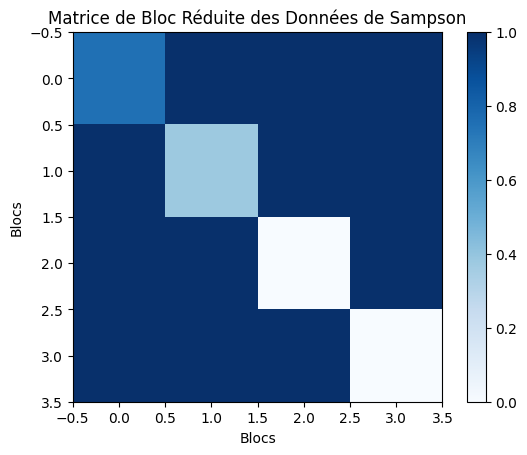

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Exemple simplifié de la matrice d'adjacence des données de Sampson

sampson_data = np.array([
    [0, 1, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
    [0, 0, 0, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
])

# Appliquer un clustering hiérarchique
clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
clusters = clustering.fit_predict(sampson_data)

# Création de la matrice de bloc réduite
def create_reduced_blockmodel(adj_matrix, clusters):
    n_blocks = len(set(clusters))
    blockmodel = np.zeros((n_blocks, n_blocks))

    for i in range(n_blocks):
        for j in range(n_blocks):
            block_i = np.where(clusters == i)[0]
            block_j = np.where(clusters == j)[0]
            sub_matrix = adj_matrix[np.ix_(block_i, block_j)]
            blockmodel[i, j] = np.mean(sub_matrix)

    return blockmodel

reduced_blockmodel = create_reduced_blockmodel(sampson_data, clusters)

# Affichage de la matrice de bloc réduite
plt.imshow(reduced_blockmodel, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title("Matrice de Bloc Réduite des Données de Sampson")
plt.xlabel("Blocs")
plt.ylabel("Blocs")
plt.show()
